In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset=pd.read_csv('/content/products.csv')

In [ ]:
dataset.head()

,Product Name,Price,Features,Rating,Review
0,Dell Vostro Core i5 10th Gen - (8 GB/1 TB HDD/...,"₹53,490",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,4.2,It's been 2 days since the purchase of this pr...
1,Dell Vostro Core i3 10th Gen - (4 GB/1 TB HDD/...,"₹34,766",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,3.7,Not good at all... Vision is also not clear an...
2,Dell Vostro Core i3 10th Gen - (4 GB/1 TB HDD/...,"₹39,998",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,After 1 week of usage the laptop performance i...
3,Dell Vostro Core i3 10th Gen - (4 GB/256 GB SS...,"₹35,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.2,The best config for kids. Runs most of the gam...
4,Dell Inspiron 7000 Core i5 10th Gen - (8 GB/51...,"₹91,252",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,0.0,No reviews for this Laptop


In [ ]:
dataset['Price'] = dataset['Price'].astype(str) #Changing the cost to string
dataset['Price'] = dataset['Price'].apply(lambda x: x.replace('.','')) #Using lambda function to replace ',' from cost


In [ ]:
for i in range(0,38):
  dataset["Price"][i]=dataset["Price"][i][1:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset['Price'] = dataset['Price'].astype(float) # Changing the cost to Float

In [ ]:
dataset['Rating'] = dataset['Rating'].astype(float)

Index(['Product Name', 'Price', 'Features', 'Rating', 'Review'], dtype='object')

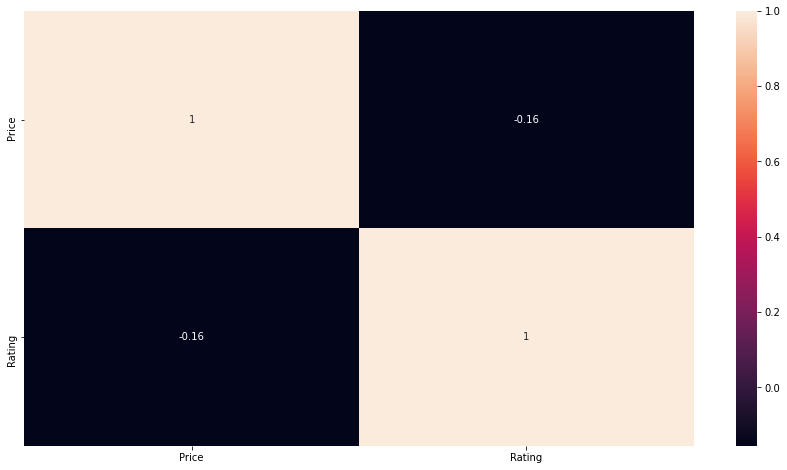

In [ ]:
#Get Correlation between different variables
corr = dataset.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.savefig("correlation.png")
dataset.columns

In [ ]:
dataset = dataset.sort_values('Rating',ascending=False)

In [ ]:
dataset

,Product Name,Price,Features,Rating,Review
23,Dell G7 15 7000 Series Core i9 8th Gen - (16 G...,138945.0,Intel Core i9 Processor (8th Gen)16 GB DDR4 RA...,4.7,No reviews for this Laptop
36,Dell Inspiron 15 5000 Series Core i5 8th Gen -...,64890.0,Intel Core i5 Processor (8th Gen)4 GB DDR4 RAM...,4.6,"very good looking ,very slimREAD MORE"
30,Dell Inspiron Core i7 7th Gen - (16 GB/1 TB HD...,119940.0,Preloaded Microsoft Office Home and Student 20...,4.5,The Laptop config I purchased was: Intel i7 7t...
7,Dell Inspiron Core i3 10th Gen - (4 GB/1 TB HD...,62990.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.5,Too good laptop look wise performance wise ver...
5,Dell G3 Core i7 9th Gen - (8 GB/1 TB HDD/512 G...,84990.0,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,4.4,Display is 220nits bright( Sufficient for dail...
25,Dell G3 Series Core i5 8th Gen - (8 GB/1 TB HD...,66990.0,60 Hz Refresh Rate- It can display upto 60 fra...,4.4,"it's good , it's performance is better than my..."
37,Dell Inspiron 15 5000 Core i7 8th Gen - (8 GB/...,81989.0,Intel Core i7 Processor (8th Gen)8 GB DDR4 RAM...,4.3,purchased at 75k.price to performance ratio(8t...
2,Dell Vostro Core i3 10th Gen - (4 GB/1 TB HDD/...,39998.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,After 1 week of usage the laptop performance i...
20,Dell Inspiron 5000 Core i3 10th Gen - (4 GB/25...,57890.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,Excellent product for general computing ( MS o...
12,Dell Inspiron 13 5000 Core i7 8th Gen - (8 GB/...,72999.0,Preloaded Microsoft Office Home and Student 20...,4.2,The laptop is really beautiful and I appreciat...


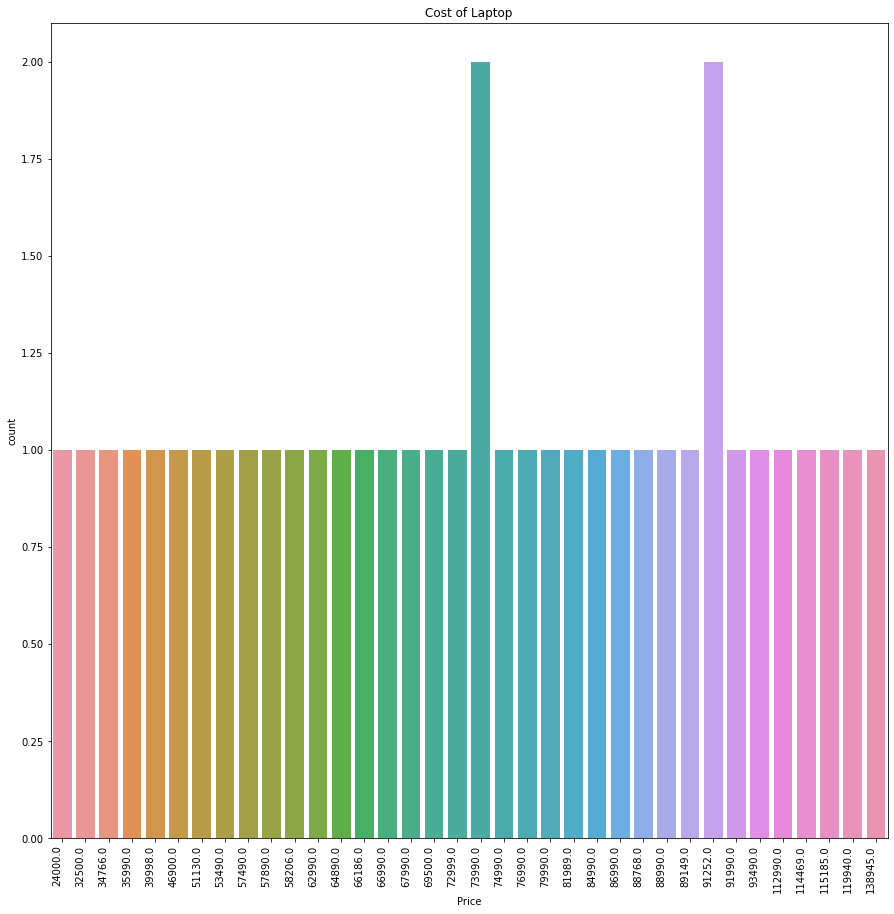

In [ ]:
sns.countplot(dataset['Price'])
sns.countplot(dataset['Price']).set_xticklabels(sns.countplot(dataset['Price']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Laptop')
plt.savefig('Cost of Laptop')

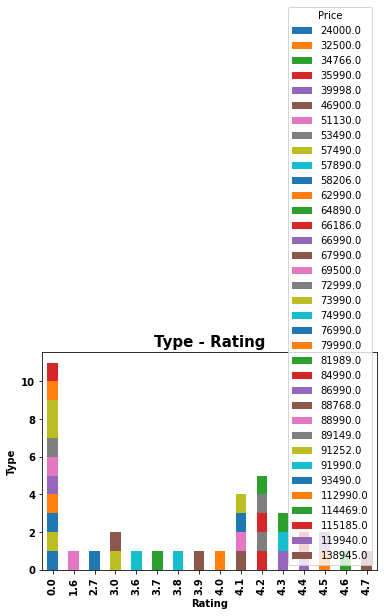

In [ ]:
type_plt=pd.crosstab(dataset['Rating'],dataset['Price'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.savefig('Type and Rating')

In [ ]:
dataset

,Product Name,Price,Features,Rating,Review
23,Dell G7 15 7000 Series Core i9 8th Gen - (16 G...,138945.0,Intel Core i9 Processor (8th Gen)16 GB DDR4 RA...,4.7,No reviews for this Laptop
36,Dell Inspiron 15 5000 Series Core i5 8th Gen -...,64890.0,Intel Core i5 Processor (8th Gen)4 GB DDR4 RAM...,4.6,"very good looking ,very slimREAD MORE"
30,Dell Inspiron Core i7 7th Gen - (16 GB/1 TB HD...,119940.0,Preloaded Microsoft Office Home and Student 20...,4.5,The Laptop config I purchased was: Intel i7 7t...
7,Dell Inspiron Core i3 10th Gen - (4 GB/1 TB HD...,62990.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.5,Too good laptop look wise performance wise ver...
5,Dell G3 Core i7 9th Gen - (8 GB/1 TB HDD/512 G...,84990.0,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,4.4,Display is 220nits bright( Sufficient for dail...
25,Dell G3 Series Core i5 8th Gen - (8 GB/1 TB HD...,66990.0,60 Hz Refresh Rate- It can display upto 60 fra...,4.4,"it's good , it's performance is better than my..."
37,Dell Inspiron 15 5000 Core i7 8th Gen - (8 GB/...,81989.0,Intel Core i7 Processor (8th Gen)8 GB DDR4 RAM...,4.3,purchased at 75k.price to performance ratio(8t...
2,Dell Vostro Core i3 10th Gen - (4 GB/1 TB HDD/...,39998.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,After 1 week of usage the laptop performance i...
20,Dell Inspiron 5000 Core i3 10th Gen - (4 GB/25...,57890.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,Excellent product for general computing ( MS o...
12,Dell Inspiron 13 5000 Core i7 8th Gen - (8 GB/...,72999.0,Preloaded Microsoft Office Home and Student 20...,4.2,The laptop is really beautiful and I appreciat...


In [ ]:
price_range=[]
for i in range(0,38):
  if(dataset.iloc[i,1]>20000 and dataset.iloc[i,1]<30000):
    price_range.append("20000-30000")
  if(dataset.iloc[i,1]>30000 and dataset.iloc[i,1]<40000):
    price_range.append("30000-40000")
  if(dataset.iloc[i,1]>40000 and dataset.iloc[i,1]<50000):
    price_range.append("40000-50000")
  if(dataset.iloc[i,1]>50000 and dataset.iloc[i,1]<60000):
    price_range.append("50000-60000")
  if(dataset.iloc[i,1]>60000 and  dataset.iloc[i,1]<70000):
    price_range.append("60000-70000")
  if(dataset.iloc[i,1]>70000 and  dataset.iloc[i,1]<80000):
    price_range.append("70000-80000")
  if(dataset.iloc[i,1]>80000 and dataset.iloc[i,1]<90000):
    price_range.append("80000-90000")
  if(dataset.iloc[i,1]>90000 and dataset.iloc[i,1]<100000):
    price_range.append("90000-100000")
  if(dataset.iloc[i,1]>100000):
    price_range.append("100000-Above")



In [ ]:
price_range=[]
for i in range(0,38):
  if(dataset.iloc[i,1]>20000 and dataset.iloc[i,1]<30000):
    price_range.append(20000)
  if(dataset.iloc[i,1]>30000 and dataset.iloc[i,1]<40000):
    price_range.append(30000)
  if(dataset.iloc[i,1]>40000 and dataset.iloc[i,1]<50000):
    price_range.append(40000)
  if(dataset.iloc[i,1]>50000 and dataset.iloc[i,1]<60000):
    price_range.append(50000)
  if(dataset.iloc[i,1]>60000 and  dataset.iloc[i,1]<70000):
    price_range.append(60000)
  if(dataset.iloc[i,1]>70000 and  dataset.iloc[i,1]<80000):
    price_range.append(70000)
  if(dataset.iloc[i,1]>80000 and dataset.iloc[i,1]<90000):
    price_range.append(80000)
  if(dataset.iloc[i,1]>90000 and dataset.iloc[i,1]<100000):
    price_range.append(90000)
  if(dataset.iloc[i,1]>100000):
    price_range.append(100000)

In [ ]:
price_range

['100000-Above',
 '60000-70000',
 '100000-Above',
 '60000-70000',
 '80000-90000',
 '60000-70000',
 '80000-90000',
 '30000-40000',
 '50000-60000',
 '70000-80000',
 '100000-Above',
 '60000-70000',
 '50000-60000',
 '30000-40000',
 '50000-60000',
 '50000-60000',
 '70000-80000',
 '40000-50000',
 '30000-40000',
 '60000-70000',
 '90000-100000',
 '30000-40000',
 '70000-80000',
 '80000-90000',
 '50000-60000',
 '90000-100000',
 '60000-70000',
 '80000-90000',
 '100000-Above',
 '70000-80000',
 '20000-30000',
 '80000-90000',
 '90000-100000',
 '70000-80000',
 '100000-Above',
 '90000-100000',
 '70000-80000',
 '80000-90000']

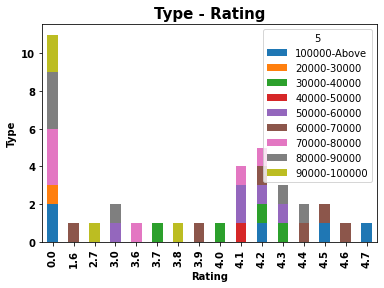

In [ ]:
type_plt=pd.crosstab(df.iloc[:,3],df.iloc[:,5])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.savefig('Type and Rating')

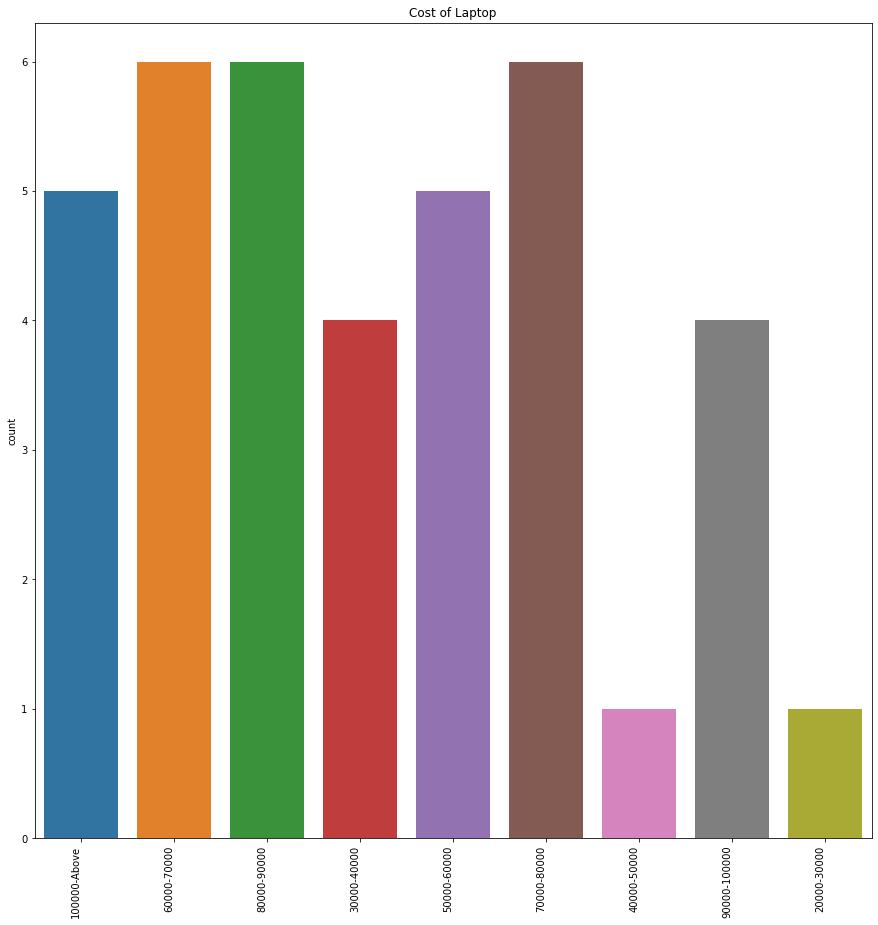

In [ ]:
sns.countplot(price_range)
sns.countplot(price_range).set_xticklabels(sns.countplot(price_range).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Laptop')
plt.savefig('Cost of Laptop')

In [ ]:
price_range

[100000,
 60000,
 100000,
 60000,
 80000,
 60000,
 80000,
 30000,
 50000,
 70000,
 100000,
 60000,
 50000,
 30000,
 50000,
 50000,
 70000,
 40000,
 30000,
 60000,
 90000,
 30000,
 70000,
 80000,
 50000,
 90000,
 60000,
 80000,
 100000,
 70000,
 20000,
 80000,
 90000,
 70000,
 100000,
 90000,
 70000,
 80000]

In [ ]:
X=dataset.iloc[:,:].values

In [ ]:
price_range=pd.DataFrame(price_range)

In [ ]:
price_range=price_range.iloc[:,:].values

In [ ]:
price_range.shape

(38, 1)

In [ ]:
X.shape

(38, 5)

In [ ]:
df=np.concatenate((X,price_range),axis=1)

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df

,0,1,2,3,4,5
0,Dell G7 15 7000 Series Core i9 8th Gen - (16 G...,138945,Intel Core i9 Processor (8th Gen)16 GB DDR4 RA...,4.7,No reviews for this Laptop,100000-Above
1,Dell Inspiron 15 5000 Series Core i5 8th Gen -...,64890,Intel Core i5 Processor (8th Gen)4 GB DDR4 RAM...,4.6,"very good looking ,very slimREAD MORE",60000-70000
2,Dell Inspiron Core i7 7th Gen - (16 GB/1 TB HD...,119940,Preloaded Microsoft Office Home and Student 20...,4.5,The Laptop config I purchased was: Intel i7 7t...,100000-Above
3,Dell Inspiron Core i3 10th Gen - (4 GB/1 TB HD...,62990,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.5,Too good laptop look wise performance wise ver...,60000-70000
4,Dell G3 Core i7 9th Gen - (8 GB/1 TB HDD/512 G...,84990,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,4.4,Display is 220nits bright( Sufficient for dail...,80000-90000
5,Dell G3 Series Core i5 8th Gen - (8 GB/1 TB HD...,66990,60 Hz Refresh Rate- It can display upto 60 fra...,4.4,"it's good , it's performance is better than my...",60000-70000
6,Dell Inspiron 15 5000 Core i7 8th Gen - (8 GB/...,81989,Intel Core i7 Processor (8th Gen)8 GB DDR4 RAM...,4.3,purchased at 75k.price to performance ratio(8t...,80000-90000
7,Dell Vostro Core i3 10th Gen - (4 GB/1 TB HDD/...,39998,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,After 1 week of usage the laptop performance i...,30000-40000
8,Dell Inspiron 5000 Core i3 10th Gen - (4 GB/25...,57890,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,4.3,Excellent product for general computing ( MS o...,50000-60000
9,Dell Inspiron 13 5000 Core i7 8th Gen - (8 GB/...,72999,Preloaded Microsoft Office Home and Student 20...,4.2,The laptop is really beautiful and I appreciat...,70000-80000
